# Recall, Precision, PR Curve and ROC Curve Explained

Sources:

- Doug Steen, Precision-Recall Curves, https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248

- Juan C Olamendy, Choosing the Right Metrics: Recall, Precision, PR Curve and ROC Curve Explained, https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248

- Chris Kuo/Dr. Dataman, Revisiting the ROC and the Precision-Recall Curves, https://medium.com/dataman-in-ai/revisiting-the-roc-and-the-precision-recall-curves-f9c4975b1dd

- Maria Gusarova, Understanding AUC — ROC and Precision-Recall Curves, https://medium.com/@data.science.enthusiast/auc-roc-curve-ae9180eaf4f7

- Juan Esteban de la Calle, How and Why I Switched from the ROC Curve to the Precision-Recall Curve to Analyze My Imbalanced Models: A Deep Dive, https://juandelacalle.medium.com/how-and-why-i-switched-from-the-roc-curve-to-the-precision-recall-curve-to-analyze-my-imbalanced-6171da91c6b8


#### Precision and Recall

**Recall**:

Recall = True Positives / (True Positives + False Negatives)

**Precision:**

Precision = True Positives / (True Positives + False Positives)

**Example:**
- If there were 100 people with a disease and the test correctly identified 80 of them, the recall would be 0.8.
- If the test predicted that 50 people had the disease, but only 30 of them actually did, the precision would be 0.6.


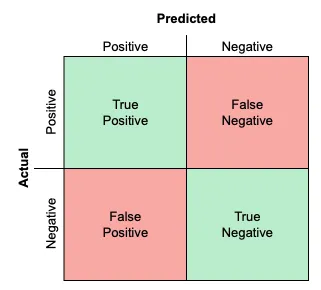

In [1]:
from IPython.display import Image
Image(filename="figures/recallprecision1.png")

In [2]:
from sklearn.metrics import precision_score, recall_score

In [3]:
# Assume you have the true labels (y_true) and predicted labels (y_pred)
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 1, 1, 1, 0, 0, 0, 1, 1, 0]
# Calculate precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")
# Calculate recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

Precision: 0.67
Recall: 0.80


#### The Precision-Recall (PR) Curve


- In a **PR curve**, precision is plotted on the y-axis, and recall is plotted on the x-axis. 
- Each point on the curve represents a different threshold value. 
- As the threshold varies, the balance between precision and recall changes.
- **High Precision and Low Recall:** This indicates that the model is very accurate in its positive predictions but fails to capture a significant number of actual positive cases.
- **Low Precision and High Recall:** This suggests that the model captures most of the positive cases but at the expense of making more false positive errors.

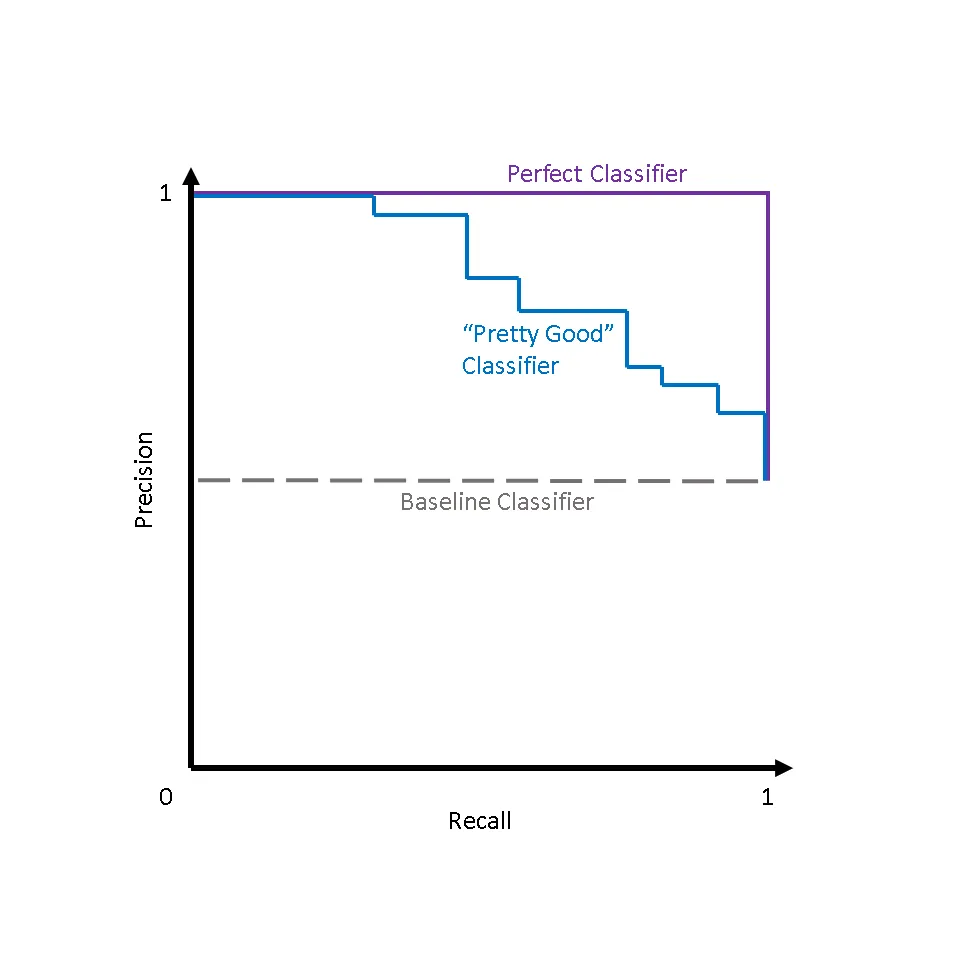

In [4]:
Image(filename="figures/recallprecision2.png", width=500)

In [5]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [6]:
# Train a Logistic Regression classifier
# model = LogisticRegression()
# model.fit(X_train, y_train)
# # Predict probabilities for the test set
# y_scores = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
# Assume you have the true labels (y_true) and predicted probabilities (y_scores)
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_scores = [0.8, 0.6, 0.9, 0.7, 0.4, 0.6, 0.3, 0.5, 0.8, 0.2]
# Compute precision-recall curve
# precision is an array of precision values at different thresholds.
# recall is an array of recall values at different thresholds.
# thresholds is an array of threshold values used to compute precision and recall.
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

/var/folders/wy/wgb54ckn2g13mvl5wtsq0nr40000gn/T/ipykernel_12890/3259965742.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left')


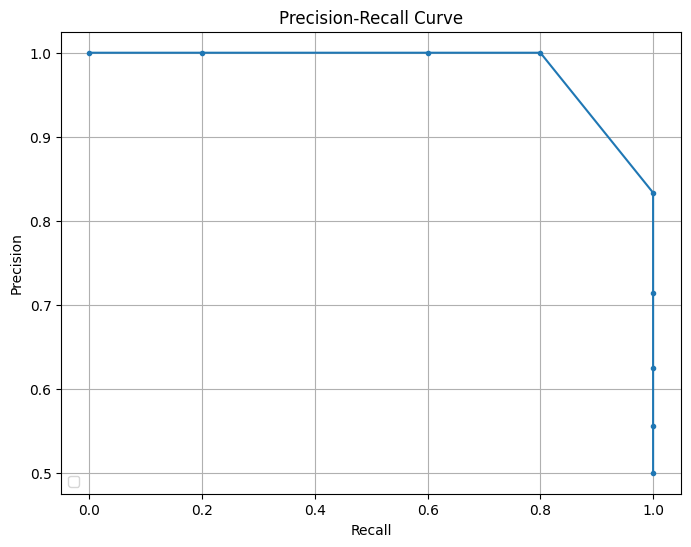

In [7]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

- The **PR curve** can be used to select an appropriate threshold for making predictions. 
- By examining the curve, you can find the point where precision begins to drop significantly and set the threshold just before this drop.
- This allows you to balance both precision and recall effectively. 
- Once the threshold is identified, predictions can be made by checking whether the model’s score for each instance is greater than or equal to this threshold.

**PR-AUC (Area Under the PR Curve):**
- Summary metric that captures the model’s performance across all thresholds.
- **Perfect classifier: PR-AUC = 1.0** (perfect precision and recall at all thresholds).
- **Random classifier: PR-AUC equal to the proportion of positive labels in the dataset** (no better than chance performance).

#### The Receiver Operating Characteristic (ROC) Curve

- Evaluate binary classification models.

- Plot the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold settings.

- **True Positive Rate (TPR):**
    * Also called **recall** or **sensitivity.**
    * Ratio of positive instances correctly classified as positive
    
- **True Negative Rate (TNR):**
    * Also called **specificity.**
    * Ratio of negative instances correctly classified as negative

- **False Positive Rate (FPR):**
    * Ratio of negative instances that are incorrectly classified as positive. 
    * Equal to 1 — True Negative Rate (TNR).
      
- **ROC-AUC (Area Under the ROC Curve):**
    * A single scalar value that summarizes the overall ability of the model to discriminate between the positive and negative classes over all possible thresholds.

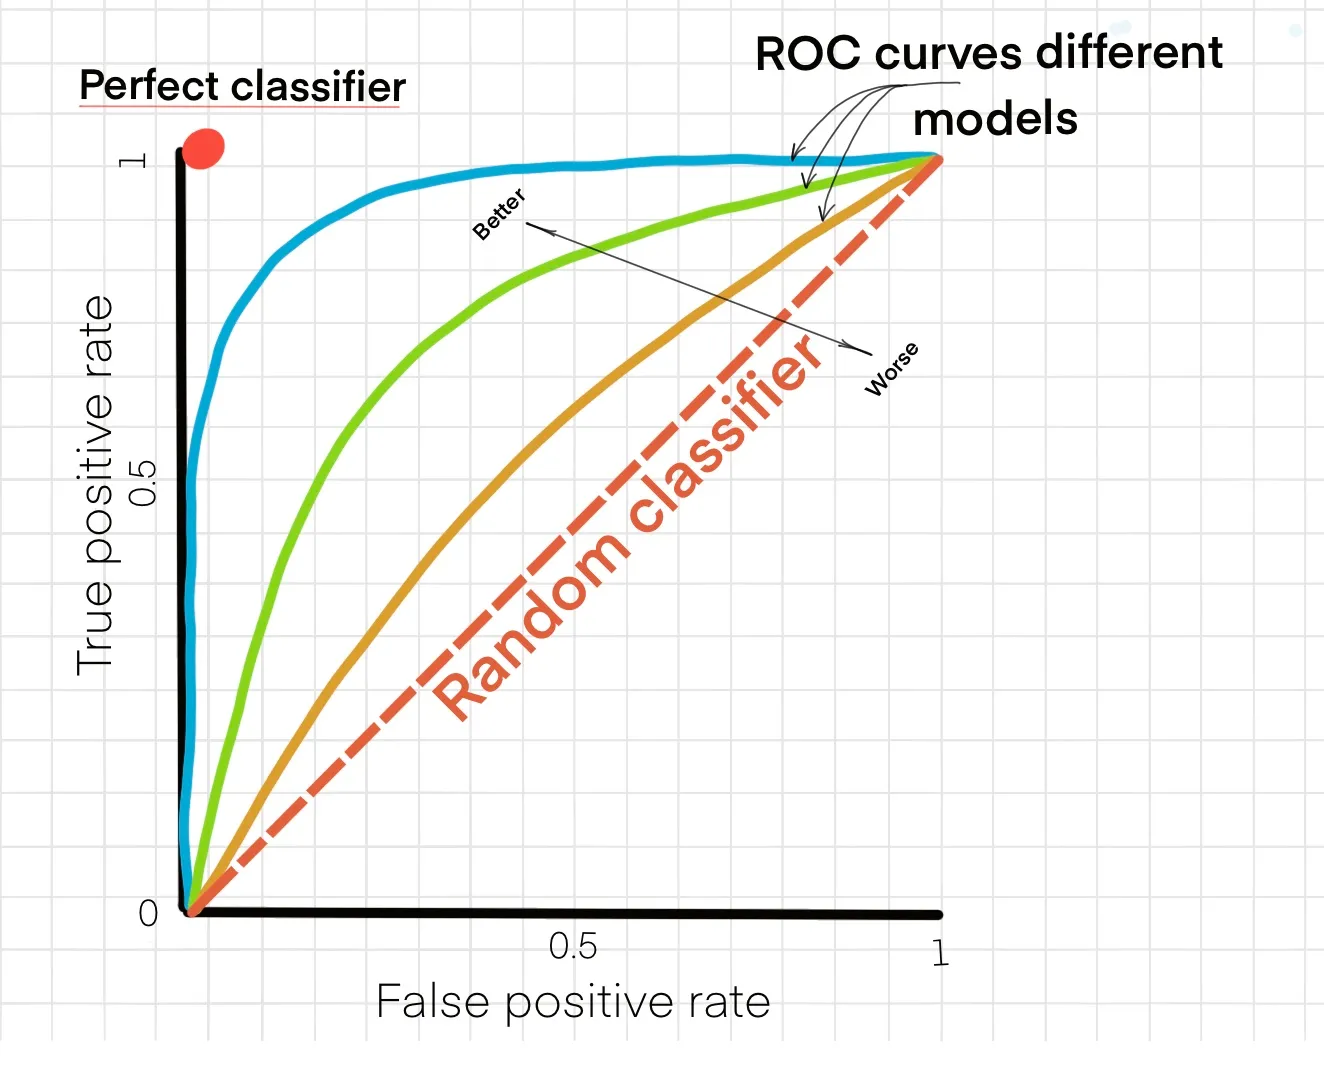

In [8]:
Image(filename="figures/recallprecision4.png", width=500)

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

In [10]:
## Predict probabilities for the test set
# y_scores = model.predict_proba(X_test)[:, 1]  # probabilities for the positive class
# Assume you have the true labels (y_true) and predicted probabilities (y_scores)
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_scores = [0.8, 0.6, 0.9, 0.7, 0.4, 0.6, 0.3, 0.5, 0.8, 0.2]
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

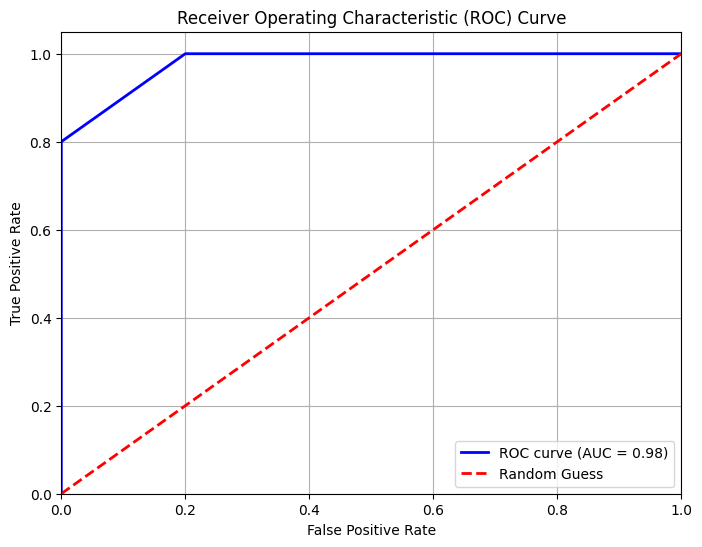

In [11]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Curve Analysis of ROC Curve

- **A curve closer to the top-left corner** indicates a high sensitivity and specificity: the model is effective in classifying both classes correctly.
- **A higher curve** indicates better performance, with the ideal point being in the top left corner of the plot (high TPR, low FPR).
- **A curve near the diagonal line** (from bottom-left to top-right) indicates that the classifier is performing no better than random guessing.
- **ROC-AUC (Area Under the ROC Curve)** ranges from 0.0 to 1.0:
    * 0.5: This indicates a model with no discriminative ability, equivalent to random guessing.
    * 1.0: This represents a perfect model that correctly classifies all positive and negative instances.
    * < 0.5: This suggests a model that performs worse than random chance, often indicating serious issues in model training or data handling.
    * The **ROC-AUC** is particularly useful in scenarios where the class distribution is imbalanced. 
    * **ROC-AUC** is not affected by the proportion of positive and negative instances.

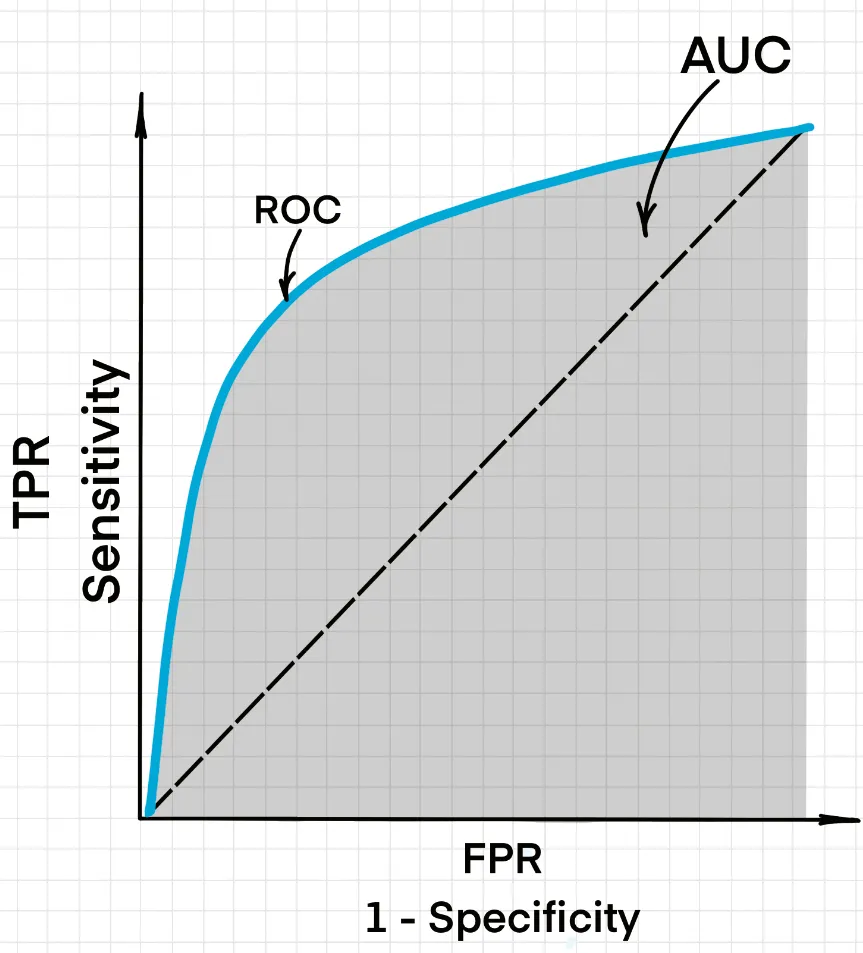

In [12]:
Image(filename="figures/recallprecision3a.png", width=500)

#### Key Benefits of Using **ROC-AUC**

- **Robust to Class Imbalance:** Unlike accuracy, ROC-AUC is not influenced by the number of cases in each class, making it suitable for imbalanced datasets.
- **Threshold Independence:** It evaluates the model’s performance across all possible thresholds, providing a comprehensive measure of its effectiveness.
- **Scale Invariance:** The ROC-AUC is not affected by the scale of the scores or probabilities generated by the model, assessing performance based on the ranking of predictions.

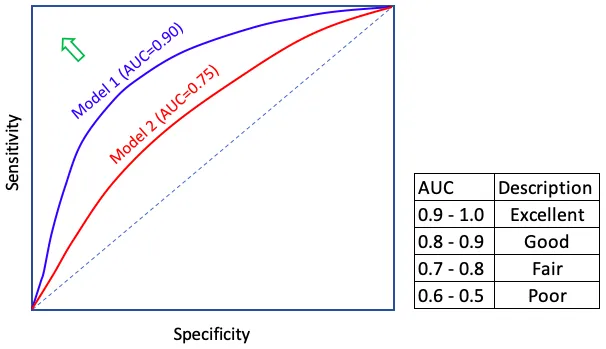

In [13]:
Image(filename="figures/recallprecision3.png")

#### Threshold Selection using the ROC Curve

The ROC curve can be used to select an appropriate threshold for making predictions:

- Lowering the threshold means the model starts classifying more instances as positive, increasing recall but potentially decreasing precision. 
- The trade-off between precision and recall needs to be managed carefully based on the application’s tolerance for false positives.
- The point where the precision and recall curves cross might be considered an optimal balance, especially when false positives and false negatives carry similar costs.

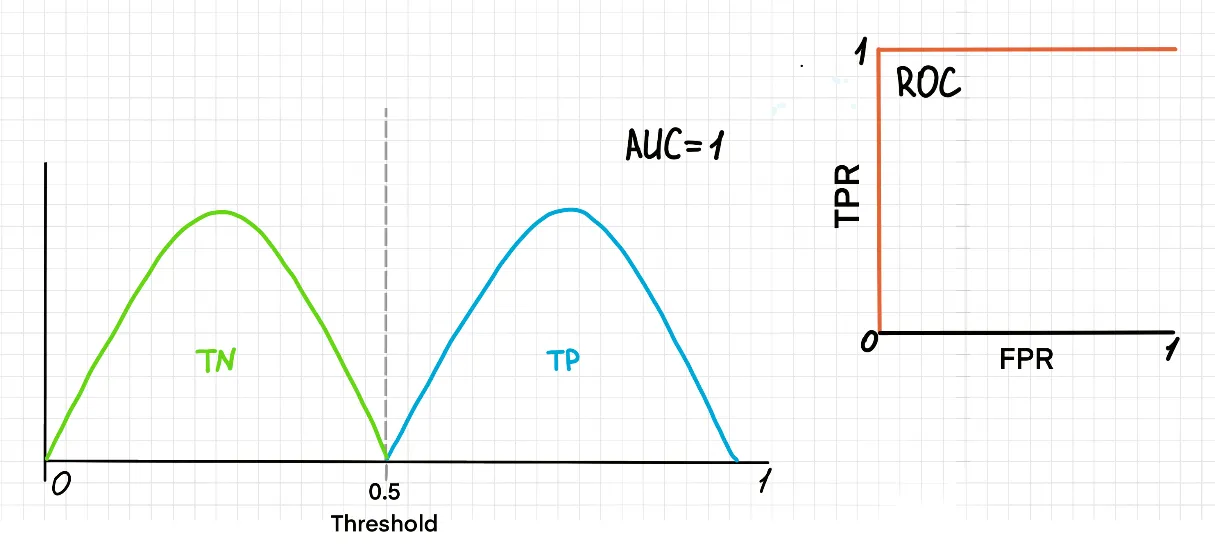

In [14]:
Image(filename="figures/recallprecision5a.png", width=500)

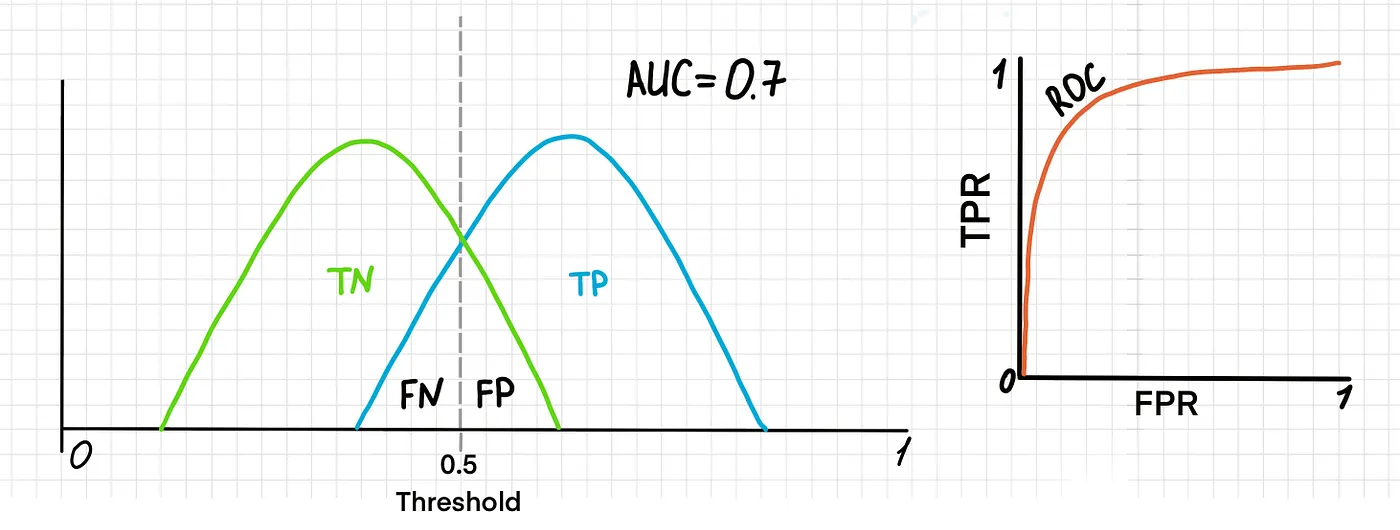

In [15]:
Image(filename="figures/recallprecision5b.png", width=500)

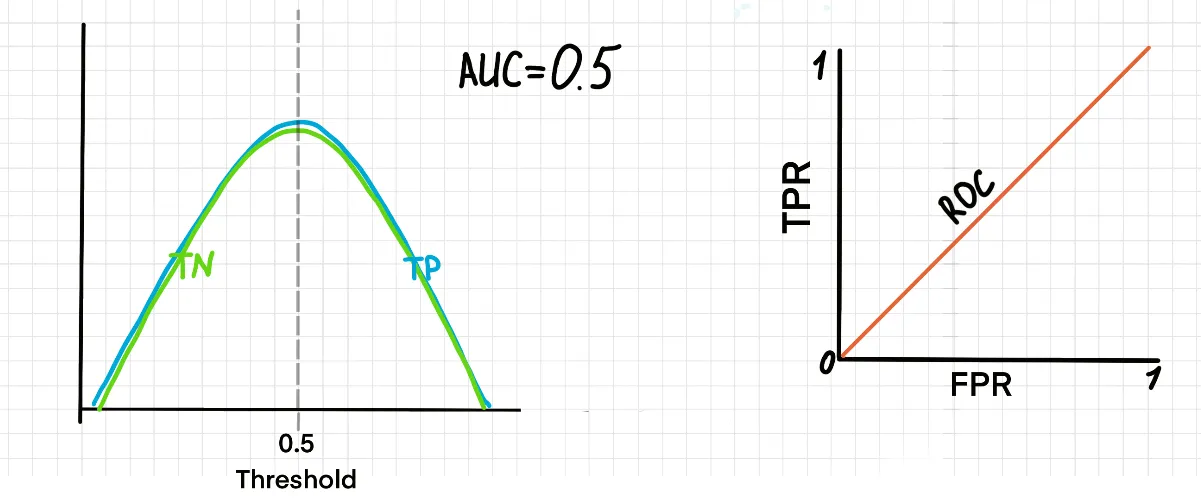

In [16]:
Image(filename="figures/recallprecision5c.png", width=500)

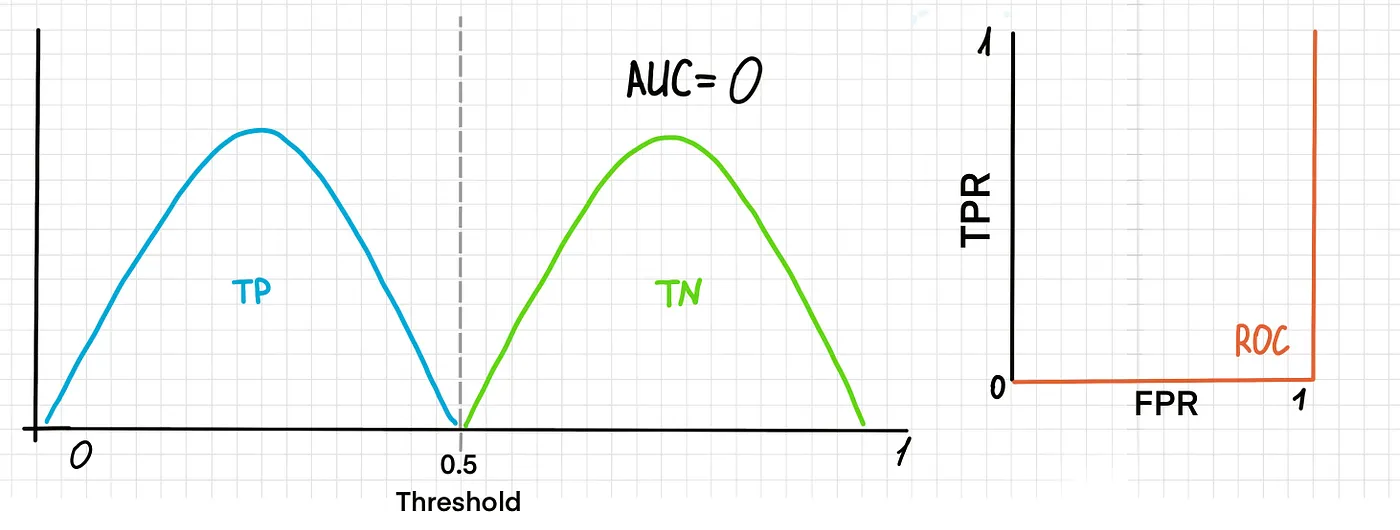

In [17]:
Image(filename="figures/recallprecision5d.png", width=500)

#### PR Curve vs. ROC Curve

**When to Use the PR Curve:**

- **Imbalanced Datasets:** 
    * When the positive class is rare, and the dataset is heavily imbalanced, the PR curve is more informative than the ROC curve. 
    * In imbalanced datasets with rare positive instances, the ROC curve can be misleading, showing high performance even if the model performs poorly on the minority class.
    * Examples: fraud detection, disease diagnosis. 
- **Costly False Positives:** If false positives are more costly or significant than false negatives, the PR curve is more suitable as it focuses on precision. Example: spam email detection.

**When to Use the ROC Curve:**

- **More Balanced Datasets:** When the dataset is more balanced or when equal emphasis is placed on the performance regarding both false positives and false negatives, the ROC curve is preferred.

#### Example: Heart Disease Diagnosis

In [18]:
!pip install ucimlrepo

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
import ssl

# Ignore ssl certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
# print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [20]:
data = X
data['num'] = y
print(data)
print(data.isna().sum())
data.dropna(inplace=True)
print(data.isna().sum())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    2  


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

def str_features_to_numeric(data):
    # Transforms all string features of the df to numeric features
    
    # Determination categorical features
    categorical_columns = []
    numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    features = data.columns.values.tolist()
    for col in features:
        if data[col].dtype in numerics: continue
        categorical_columns.append(col)
    
    # Encoding categorical features
    for col in categorical_columns:
        if col in data.columns:
            le = LabelEncoder()
            le.fit(list(data[col].astype(str).values))
            data[col] = le.transform(list(data[col].astype(str).values))
    
    return data

In [22]:
# Transform all string features of the df to numeric features
data = str_features_to_numeric(data)
data.shape

(297, 14)

In [23]:
# Select only class labels 0 and 1
data = data[data['num'].isin([0, 1])]
data.reset_index(inplace=True)
data.shape

(214, 15)

In [24]:
data.describe()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,214.000000,214.000000,214.000000,214.000000,214.00000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,146.925234,53.392523,0.626168,2.929907,130.21028,244.920561,0.121495,0.920561,155.401869,0.219626,0.705607,1.467290,0.392523,4.172897,0.252336
std,86.835087,9.233799,0.484954,0.973712,16.90314,50.835815,0.327468,0.996825,20.809604,0.414964,0.861850,0.594462,0.728456,1.790170,0.435372
min,0.000000,29.000000,0.000000,1.000000,94.00000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,72.250000,46.000000,0.000000,2.000000,120.00000,211.000000,0.000000,0.000000,144.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,147.500000,54.000000,1.000000,3.000000,130.00000,240.000000,0.000000,0.000000,159.000000,0.000000,0.400000,1.000000,0.000000,3.000000,0.000000
75%,220.750000,60.000000,1.000000,4.000000,140.00000,269.750000,0.000000,2.000000,170.750000,0.000000,1.200000,2.000000,1.000000,7.000000,0.750000
max,301.000000,76.000000,1.000000,4.000000,192.00000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,1.000000


In [25]:
# Create input and target features:
X = data.drop('num', axis = 1) 
y = data['num']

In [26]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=56)

In [27]:
# Fit a vanilla Logistic Regression classifier and make predictions
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

/Users/markjack/GSU_Fall2024/IFI8410/.venv_ifi8410/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true:
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters:
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN:
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0:
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

# Test the function:
calc_precision_recall(y_test, y_pred_test)

(0.6666666666666666, 0.5333333333333333)

In [29]:
# LOGISTIC REGRESSION (NO REGULARIZATION)

# Fit and predict test class probabilities:
lr = LogisticRegression(max_iter=10000, penalty=None)

lr.fit(X_train, y_train)

y_test_probs = lr.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates:
precision_scores = []
recall_scores = []

# Define probability thresholds to use, between 0 and 1:
probability_thresholds = np.linspace(0, 1, num=100)

# Find true positive / false positive rate for each threshold:
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = calc_precision_recall(y_test, y_test_preds)
        
    precision_scores.append(precision)
    recall_scores.append(recall)

In [30]:
# LOGISTIC REGRESSION (L2 REGULARIZATION)

# Fit and predict test class probabilities
lr_l2 = LogisticRegression(max_iter=1000, penalty='l2')
lr_l2.fit(X_train, y_train)
y_test_probs = lr_l2.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
l2_precision_scores = []
l2_recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0,1,num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = calc_precision_recall(y_test, y_test_preds)
        
    l2_precision_scores.append(precision)
    l2_recall_scores.append(recall)

/Users/markjack/GSU_Fall2024/IFI8410/.venv_ifi8410/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


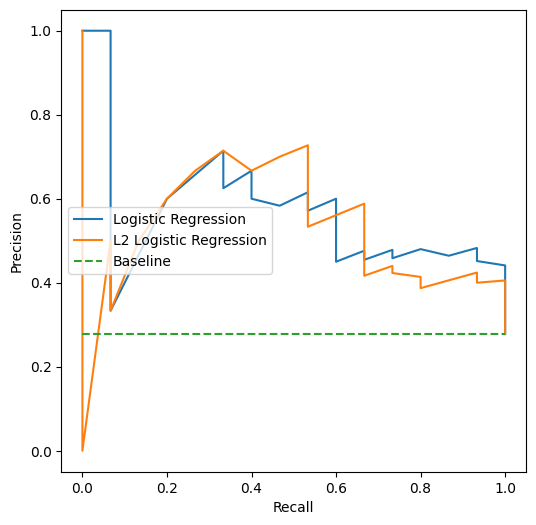

In [31]:
# Plot precision-recall curve

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall_scores, precision_scores, label='Logistic Regression')
ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left')

In [32]:
print(y_test.to_numpy())
print(lr.predict_proba(X_test)[:,1])
print(lr_l2.predict_proba(X_test)[:,1])

[0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0]
[0.37696196 0.20626221 0.09802432 0.66213296 0.01892647 0.08907727
 0.69958667 0.15262043 0.02918885 0.96723868 0.43970024 0.3194811
 0.55935803 0.2315037  0.26416019 0.51956371 0.00298885 0.94450759
 0.05398586 0.91293338 0.13130968 0.07201289 0.00596423 0.10144255
 0.02817189 0.29399399 0.52248337 0.05382276 0.02826889 0.09279651
 0.05481734 0.25531809 0.37958188 0.09841696 0.02540295 0.05015497
 0.17284172 0.46991527 0.05128258 0.06902225 0.37922958 0.70401746
 0.15756345 0.02912963 0.41087483 0.13134695 0.00684379 0.04964966
 0.6039317  0.00341271 0.01491866 0.90351053 0.90458653 0.15616789]
[0.37557012 0.23312018 0.0955255  0.61254614 0.02872894 0.19057478
 0.61203956 0.17528462 0.04393697 0.92650249 0.41032561 0.33138398
 0.53320237 0.17856173 0.36733933 0.5874654  0.01505818 0.93660951
 0.04963386 0.90900284 0.1207607  0.17116252 0.01598503 0.12295853
 0.04241307 0.2390

In [33]:
# Get AUC-PR scores

from sklearn.metrics import auc, average_precision_score

print(f'LR (No reg.) AUC-PR: {round(auc(recall_scores, precision_scores),2)}')
print(f'LR(L2 reg.) AUC-PR: {round(auc(l2_recall_scores, l2_precision_scores),2)}')

print('\n')

print(f'LR (No reg.) Avg. Prec.: {round(average_precision_score(y_test.to_numpy(), lr.predict_proba(X_test)[:,1]), 2)}')
print(f'LR (L2 reg.) Avg. Prec.: {round(average_precision_score(y_test.to_numpy(), lr_l2.predict_proba(X_test)[:,1]), 2)}')

LR (No reg.) AUC-PR: 0.56
LR(L2 reg.) AUC-PR: 0.52


LR (No reg.) Avg. Prec.: 0.59
LR (L2 reg.) Avg. Prec.: 0.56


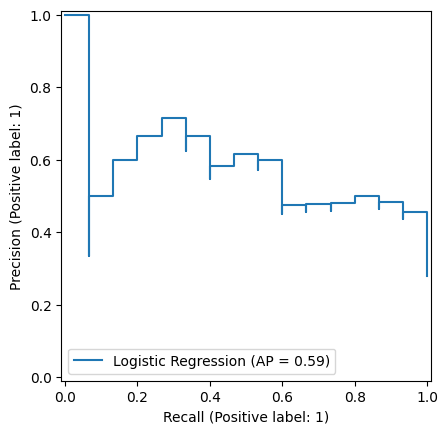

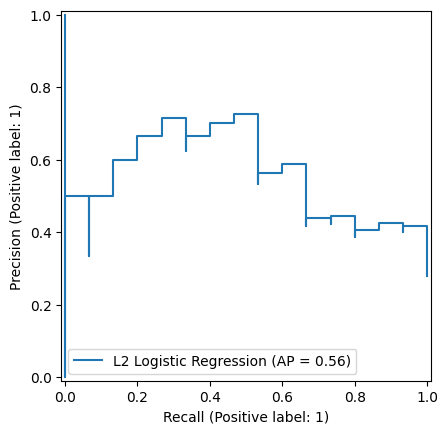

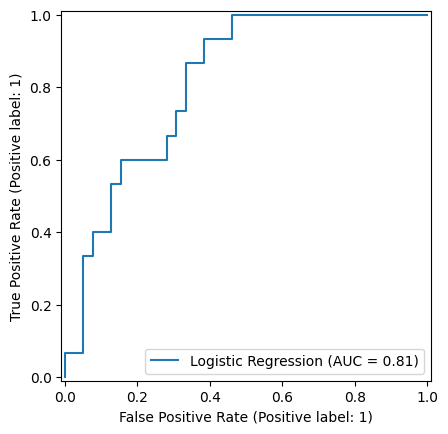

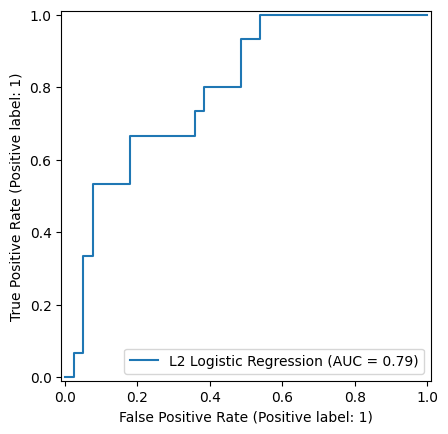

In [34]:
# Use sklearn to plot precision-recall curves and ROC curves

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
PrecisionRecallDisplay.from_estimator(lr, X_test, y_test, name = 'Logistic Regression')
PrecisionRecallDisplay.from_estimator(lr_l2, X_test, y_test, name = 'L2 Logistic Regression')

RocCurveDisplay.from_estimator(lr, X_test, y_test, name = 'Logistic Regression')
RocCurveDisplay.from_estimator(lr_l2, X_test, y_test, name = 'L2 Logistic Regression')